In [32]:
### pip install pystan
###  conda install pystan -c conda-forge
### conda install -c conda-forge fbprophet
import pandas as pd
import pystan
import fbprophet
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
# fbprpohphetrule: Rename datetime column as ds & target column as y 

In [10]:
pwd

'D:\\Users\\kmahendra\\FbProphet-master'

In [13]:
df=pd.read_csv("D:/Users/kmahendra/FbProphet-master/airline_passengers.csv")

In [15]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [16]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


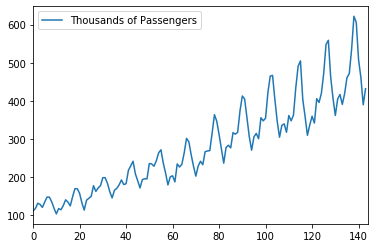

In [18]:
df.plot()

# fbprpohphetrule: Rename datetime column as ds & target column as y 

In [20]:
df.columns=['ds','y']
df.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [21]:
df.drop(144,axis=0,inplace=True)

In [24]:
df.tail()

,ds,y
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [25]:
df.dtypes

ds     object
y     float64
dtype: object

In [26]:
df['ds']=pd.to_datetime(df['ds'])

In [27]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [28]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [29]:
df.tail()

,ds,y
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0
143,1960-12-01,432.0


In [33]:
from fbprophet import Prophet

In [34]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_column_matrix',
 'sample_model',
 'samp

In [36]:
#initialize the model
model=Prophet()

In [38]:
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
##create future dates of 365 days
model.component_modes

{'additive': ['yearly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [42]:
future_dates=model.make_future_dataframe(periods=365)
future_dates

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30


In [43]:
prediction=model.predict(future_dates)

In [44]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.583811,57.038332,112.755648,106.583811,106.583811,-21.946575,-21.946575,-21.946575,-21.946575,-21.946575,-21.946575,0.0,0.0,0.0,84.637236
1,1949-02-01,108.760063,50.107400,106.456530,108.760063,108.760063,-30.707281,-30.707281,-30.707281,-30.707281,-30.707281,-30.707281,0.0,0.0,0.0,78.052782
2,1949-03-01,110.725710,81.036375,138.191088,110.725710,110.725710,-0.469476,-0.469476,-0.469476,-0.469476,-0.469476,-0.469476,0.0,0.0,0.0,110.256234
3,1949-04-01,112.901962,76.049189,136.209857,112.901962,112.901962,-5.166670,-5.166670,-5.166670,-5.166670,-5.166670,-5.166670,0.0,0.0,0.0,107.735292
4,1949-05-01,115.008012,82.146659,138.281409,115.008012,115.008012,-3.765920,-3.765920,-3.765920,-3.765920,-3.765920,-3.765920,0.0,0.0,0.0,111.242092


In [45]:
df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


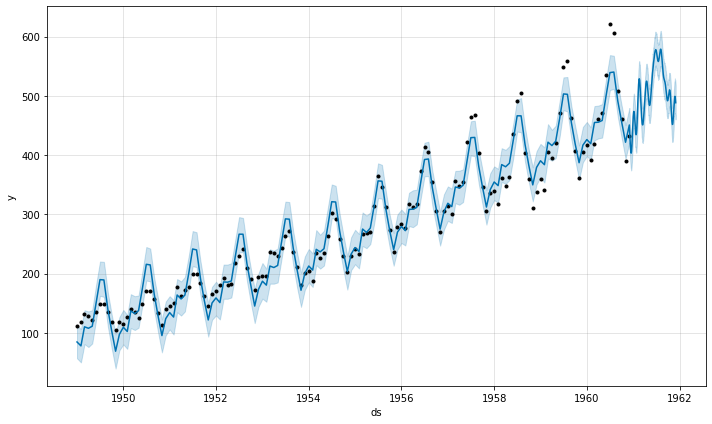

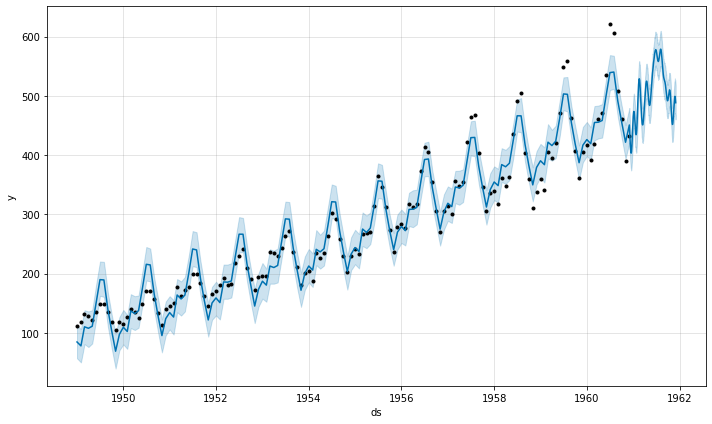

In [46]:
### plot the predicted projection
model.plot(prediction)

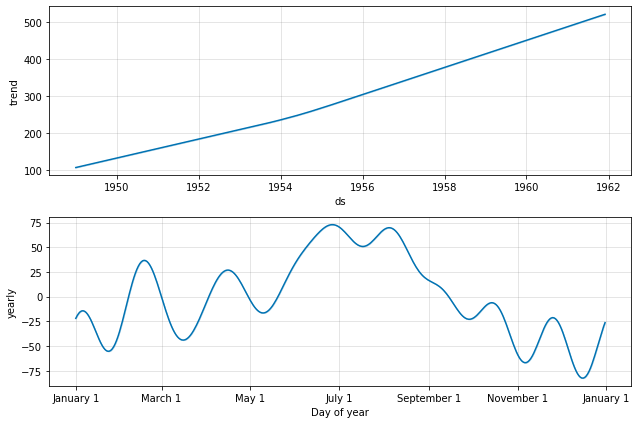

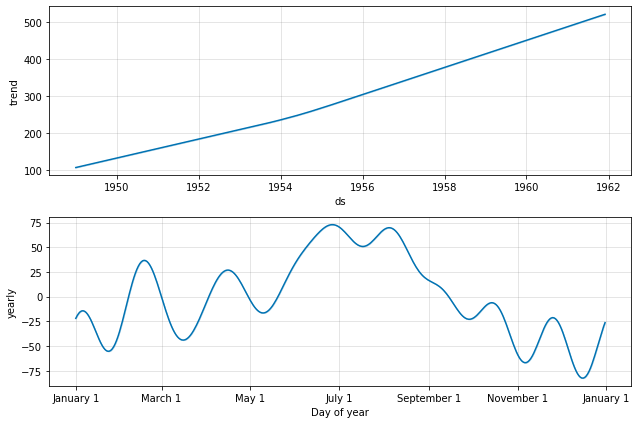

In [47]:
#### Visualize Each Components[Trends,yearly]
model.plot_components(prediction)

Time Series Analysis

1960-1962
Cross Validation
1960-61---Train dataset
1961-62--Test dataset
1962-63---Validation

In [49]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,158.482129,158.110793,158.778591,150.0,1951-01-18
1,1951-03-01,171.498221,170.369644,172.443241,178.0,1951-01-18
2,1951-04-01,159.630469,157.471007,161.498388,163.0,1951-01-18
3,1951-05-01,144.280404,140.972444,147.345671,172.0,1951-01-18
4,1951-06-01,178.395560,173.700978,182.967897,178.0,1951-01-18


In [50]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1089.123674,33.001874,25.952024,0.078971,0.073690,0.227273
1,42 days,1014.683902,31.854103,25.290641,0.077224,0.073690,0.181818
2,46 days,911.993612,30.199232,24.793810,0.079557,0.084023,0.136364
3,47 days,1046.625579,32.351593,26.911913,0.082348,0.085498,0.136364
4,48 days,1035.396122,32.177572,26.322507,0.080244,0.085498,0.181818


In [53]:
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1089.123674,33.001874,25.952024,0.078971,0.073690,0.227273
1,42 days,1014.683902,31.854103,25.290641,0.077224,0.073690,0.181818
2,46 days,911.993612,30.199232,24.793810,0.079557,0.084023,0.136364
3,47 days,1046.625579,32.351593,26.911913,0.082348,0.085498,0.136364
4,48 days,1035.396122,32.177572,26.322507,0.080244,0.085498,0.181818
...,...,...,...,...,...,...,...
165,359 days,759.757898,27.563706,21.484113,0.067864,0.057742,0.386364
166,360 days,763.279128,27.627507,21.762430,0.068724,0.057742,0.363636
167,362 days,856.478387,29.265652,23.019270,0.067790,0.057742,0.363636
168,364 days,830.223587,28.813601,21.953509,0.064883,0.051766,0.363636


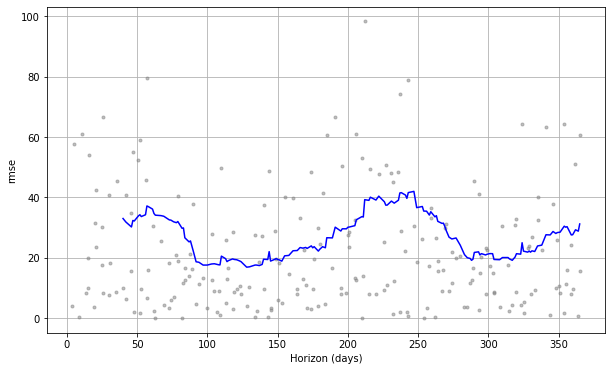

In [52]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')